In [19]:
import os
import pandas as pd

plotDir = os.path.join(os.path.dirname(os.getcwd()), 'plots')
print(plotDir)

# Load the data
df = pd.read_csv('BS_table.csv')
# only keep rows with 'SV' in 'Var1'
df = df[df['Var1'].str.contains('SV')]
# print(df.head())

c:\Users\Ailene\OneDrive - California Institute of Technology\Documents\GitHub\blindspot-multisensory\plots


In [20]:
# Create new dataframe for violin plot
df_violin = pd.DataFrame(columns=['deg', 'class', 'Eye'])

# Add data to the new dataframe from df
df_left = pd.melt(df, value_vars=['Horizontal distance', 'Vertical distance', 'Width', 'Height', 'Area'], var_name='class', value_name='deg')
df_left['Eye'] = 'Left'
df_right = pd.melt(df, value_vars=['Right_Horizontal distance', 'Right_Vertical distance', 'Right_Width', 'Right_Height', 'Right_Area'], var_name='class', value_name='deg')
df_right['Eye'] = 'Right'
# remove 'Right_'
df_right['class'] = df_right['class'].str.replace('Right_', '')

# combine the two dataframes
df_violin = pd.concat([df_left, df_right])
df_violin['class'] = df_violin['class'].str.replace('Horizontal distance', 'Distance from\nvertical meridian')
df_violin['class'] = df_violin['class'].str.replace('Vertical distance', 'Distance from\nhorizontal meridian')

# print(df_violin)

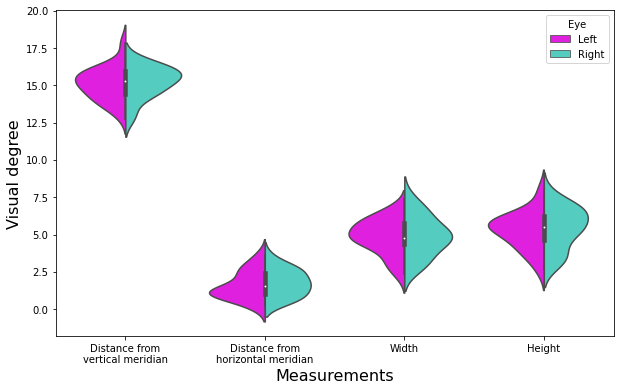

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the split violin plot
# remove rows with 'Area' in 'class'
df_violin = df_violin[~df_violin['class'].str.contains('Area')]
sns.violinplot(x='class', y='deg', hue='Eye', split=True, data=df_violin,  palette={'Left': 'magenta', 'Right': 'turquoise'})

# Set the title and labels
# plt.title('Blind Spot Measurements (N=20)')
plt.xlabel('Measurements', fontsize=16)
plt.ylabel('Visual degree', fontsize=16)


# Save the plot
plt.savefig(os.path.join(plotDir, 'BS_violin.png'))


# Show the plot
plt.show()

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


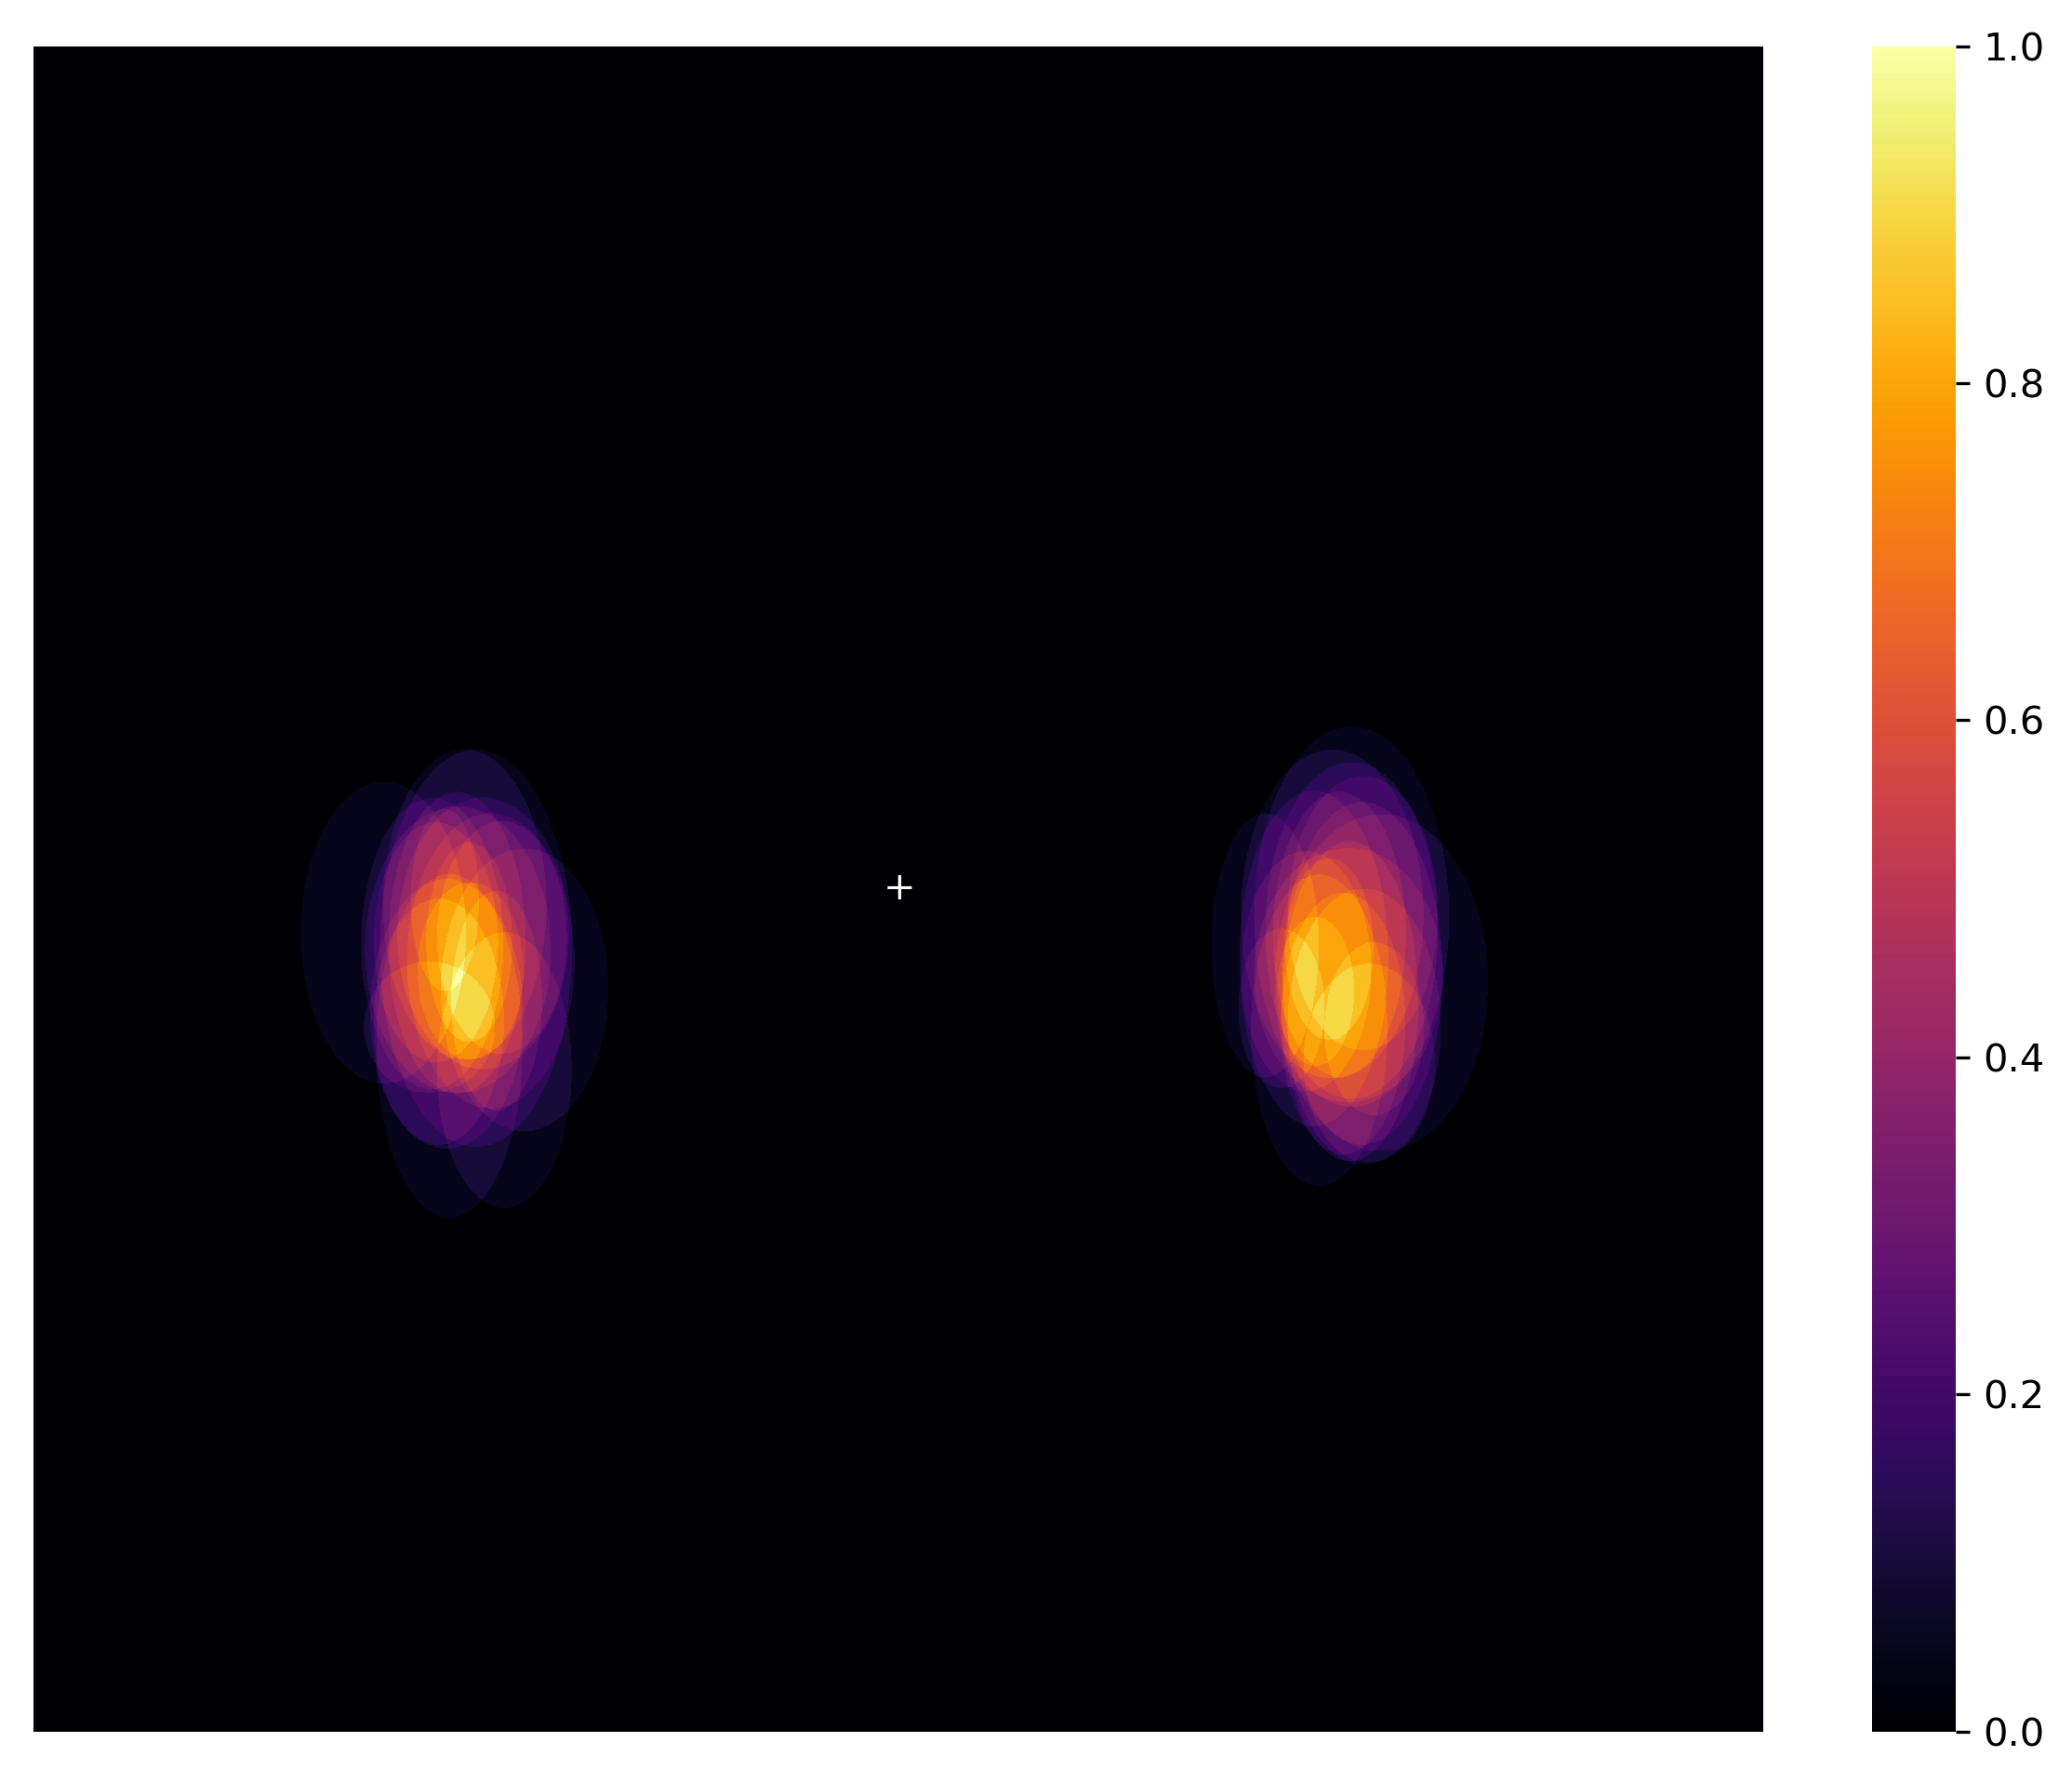

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import getpass

monitor_x_pixels, monitor_y_pixels = 3840, 2160
monitor_x_cm, monitor_y_cm = 60, 33.75
monitor_distance_cm = 57

# Convert to visual degrees
monitor_x_deg = 2 * np.degrees(np.arctan(monitor_x_cm / 2 / monitor_distance_cm))
monitor_y_deg = 2 * np.degrees(np.arctan(monitor_y_cm / 2 / monitor_distance_cm))

# round up degrees and create gridn for heatmap
# heatmap_grid = np.zeros( (round(monitor_y_deg), round(monitor_x_deg)) )
# print(heatmap_grid.shape)

# use pixel instead of visual degree
heatmap_grid = np.zeros( (monitor_y_pixels, monitor_x_pixels) )

# Function to fill ellipse in the grid
def fill_ellipse(grid, center_x, center_y, width, height, side):
    if side=='L':
        center_x = round(grid.shape[1] // 2 - center_x)
        center_y = round(grid.shape[0] // 2 + center_y)
    else:
        center_x = round(grid.shape[1] // 2 + center_x)
        center_y = round(grid.shape[0] // 2 + center_y)
    for y in range(grid.shape[0]):
        for x in range(grid.shape[1]):
            # Check if the point (x, y) is inside the ellipse
            if ((x - center_x) ** 2 / (width / 2) ** 2 + (y - center_y) ** 2 / (height / 2) ** 2) <= 1:
                grid[y, x] += 1

for _, row in df.iterrows():
    # left_x = row['Horizontal distance']
    # left_y = row['Vertical distance']
    # left_width = row['Width']
    # left_height = row['Height']
    # right_x = row['Right_Horizontal distance']
    # right_y = row['Right_Vertical distance']
    # right_width = row['Right_Width']
    # right_height = row['Right_Height']

    # use pixel instead of visual degree
    left_x = row['x_center']
    left_y = row['y_center']
    left_width = row['width_pix']
    left_height = row['height_pix']
    right_x = row['Right_x_center']
    right_y = row['Right_y_center']
    right_width = row['Right_width_pix']
    right_height = row['Right_height_pix']

    # Fill ellipses for left and right blind spots
    fill_ellipse(heatmap_grid, left_x, left_y, left_width, left_height, 'L')
    fill_ellipse(heatmap_grid, right_x, right_y, right_width, right_height, 'R')

# Add fixation cross at center
annot = np.full(heatmap_grid.shape, ' ')
annot[heatmap_grid.shape[0] // 2, heatmap_grid.shape[1] // 2] = '+'

# Plot the heatmap
plt.figure(figsize=(10, 8),dpi=300)
# normalize the heatmap
heatmap_grid = heatmap_grid / heatmap_grid.max()
sns.heatmap(heatmap_grid, cmap='inferno', annot=annot, fmt='s', cbar=True)
print(np.unique(heatmap_grid))

plt.xticks([])
plt.yticks([])


# Save the plot
plt.savefig(os.path.join(plotDir, 'blind_spot_heatmap.png'))
plt.show()

In [23]:
df['Combined_Area'] = (df['Area'] + df['Right_Area'])/2
combined_mean = df['Combined_Area'].mean()
combined_std = df['Combined_Area'].std()
print(f"Combined mean area of blind spots: {combined_mean}")
print(f"Combined std area of blind spots: {combined_std}")

Combined mean area of blind spots: 21.547000000000004
Combined std area of blind spots: 8.98620264042253


In [24]:
df['Combined_Horizontal distance'] = (df['Horizontal distance'] + df['Right_Horizontal distance'])/2
combined_mean = df['Combined_Horizontal distance'].mean()
combined_std = df['Combined_Horizontal distance'].std()
print(f"Combined mean horizontal distance of blind spots: {combined_mean}")
print(f"Combined std horizontal distance of blind spots: {combined_std}")

df['combined_Vertical distance'] = (df['Vertical distance'] + df['Right_Vertical distance'])/2
combined_mean = df['combined_Vertical distance'].mean()
combined_std = df['combined_Vertical distance'].std()
print(f"Combined mean vertical distance of blind spots: {combined_mean}")
print(f"Combined std vertical distance of blind spots: {combined_std}")


Combined mean horizontal distance of blind spots: 15.1665
Combined std horizontal distance of blind spots: 0.9761458853438272
Combined mean vertical distance of blind spots: 1.6854999999999998
Combined std vertical distance of blind spots: 0.7796606886804568
